# Part 1 Background Info

1) What is the difference between linear and logistic regression?
    
    - Linear Regression is used for regression on contiuous data, provides a continous output, and provides us with the line of best-fit for our set of data.
    
    - Logistic Regression is used for discrete/categorical data, provides us with discreet/categorical output, and provides us with a sigmoid curve that allows for predictions/classifications.
    
    
2) What is the difference between predictors and response variables?
   
    - Predictors are the variables in which can have an effect on the response, these can be measured by a model. These are also known as the independent variables that provide information about the dependent variables.
    
    - Response variables are the variables in which we are interested in, the ones we are trying to predict. These are also called indepenent variables that we are trying to figure out based on some experiments to some data.
    
    
3) What is the purpose and benefits of preprocessing data?
    
    - The purpose of processing the data is so we are able to work with data that will maximze the accuracies of the predictions we made on some data which allows our models to be more reliable. This can be a multitude of things like making sure the variables we are working with are scaled, making sure that for categorical data we convert them into dummies that provide better information, etc. The benefits of this is getting more accurate predictions and a better understanding of what the data is telling us. 
    
    
4) What is overfitting and underfitting that data? What are the consequences.
    
    - Overfitting is when the model we use on the data is too fit to just the training data provided that if any new data, or outliers, were to be added it would cause for poor performance resulting in a high error rate.
    
    - Underfitting is the opposite of overfitting in which our model doesn't fit our data properly, so it results in poor performance with both our training data and any new data, or outliers, added. The error rate is always large. 

# Part 2 About the Data

The dataset contains the following 15 features:
    
    -ID: The title ID on JustWatch.
    
    -title: The name of the title.
    
    -show type: TV show or movie.
    
    -description: A brief description.
    
    -release year: The release year.
    
    -age certification: The age certification.
    
    -runtime: The length of the episode (SHOW) or movie.
    
    -genres: A list of genres.
    
    -production countries: A list of countries that produced the title.
    
    -seasons: Number of seasons if it's a SHOW.
    
    -IMDB ID: The title ID on IMDB.
    
    -IMDB Score: Score on IMDB.
    
    -IMDB Votes: Votes on IMDB.
    
    -TMDB Popularity: Popularity on TMDB.
    
    -TMDB Score: Score on TMDB.

# Questions

1) What are the features? Response variable? Describe each.

The features we're using from this dataset are:
- type: tells us if an attribute is a show or a movie
- genre: tells us what genre a movie/show belongs to
- runtime: the time it takes for an object to be watched
- production countries: what countries was the film/show filmed in
- seasons: how many seasons has a show had
- imdb votes: how many votes did the show/film recieve on imdb
- imdb popularity: how popular the show/film is on imdb
- imdb id: the id used ot identify the film/show on imdb
- tmdb votes: the amount of votes the show/film got on tmdb
- title: the title of the show/film
- tmdb score: the score the show/film recieved on tmdb

Our response variable will be the imdb score, which is the score a film/show recieves on imdb based on its quality.
    
    
2) Which features would you classify as categorical vs. continuous?Explain.

For this dataset, the categorical variables would be type, genres, title, and production countries. These would be considered categorical because the domain of the values is fixed and are qualitative in nature, thus there can only be so many outcomes for each variable, such as type being only "movie" or "show". For our continuous variables, we have release year, runtime, seasons, imdb id, imdb score, imdb votes, imdb popularity, imdb score, tmdb votes, and tmdb score. These are considered continuous since by nature, their values are derrived from counting, and in some cases, measurements such as averaging. Something such as the imdb score would be considered continuous since its the average of all user-submited votes, thus a measurement, and this hold true for the rest of our continuous variables.
    

# Problem Statement

put what the statement is and 3-6 sentences the significance of addressing the issue and the benefits our modeling can provide**********

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# aaron
data = pd.read_csv('titles.csv')

In [4]:
# aaron
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [5]:
# aaron
data.describe()

release_year      runtime      seasons   imdb_score    imdb_votes  \
count   5806.000000  5806.000000  2047.000000  5283.000000  5.267000e+03   
mean    2016.013434    77.643989     2.165608     6.533447  2.340719e+04   
std        7.324883    39.474160     2.636207     1.160932  8.713432e+04   
min     1945.000000     0.000000     1.000000     1.500000  5.000000e+00   
25%     2015.000000    44.000000     1.000000     5.800000  5.210000e+02   
50%     2018.000000    84.000000     1.000000     6.600000  2.279000e+03   
75%     2020.000000   105.000000     2.000000     7.400000  1.014400e+04   
max     2022.000000   251.000000    42.000000     9.600000  2.268288e+06   

       tmdb_popularity   tmdb_score  
count      5712.000000  5488.000000  
mean         22.525660     6.818039  
std          68.849177     1.171560  
min           0.009442     0.500000  
25%           3.155250     6.100000  
50%           7.478000     6.900000  
75%          17.775750     7.500000  
max        1823.374000    10.000000

In [6]:
# aaron
data.head()

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm127384      Monty Python and the Holy Grail  MOVIE   
3   tm70993                        Life of Brian  MOVIE   
4  tm190788                         The Exorcist  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  King Arthur, accompanied by his squire, recrui...          1975   
3  Brian Cohen is an average young Jewish man, bu...          1979   
4  12-year-old Regan MacNeil begins to adapt an e...          1973   

  age_certification  runtime                 genres production_countries  \
0             TV-MA       48      ['documentation']               ['US']   
1                 R      113     ['crime', 'drama']               ['US']   
2                PG       91  ['comedy', 'fantasy']               ['GB']   
3                 R       94             ['comedy']               ['GB']   
4                 R      133             ['horror']               ['US']   

   seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0      1.0        NaN         NaN         NaN            0.600         NaN  
1      NaN  tt0075314         8.3    795222.0           27.612         8.2  
2      NaN  tt0071853         8.2    530877.0           18.216         7.8  
3      NaN  tt0079470         8.0    392419.0           17.505         7.8  
4      NaN  tt0070047         8.1    391942.0           95.337         7.7

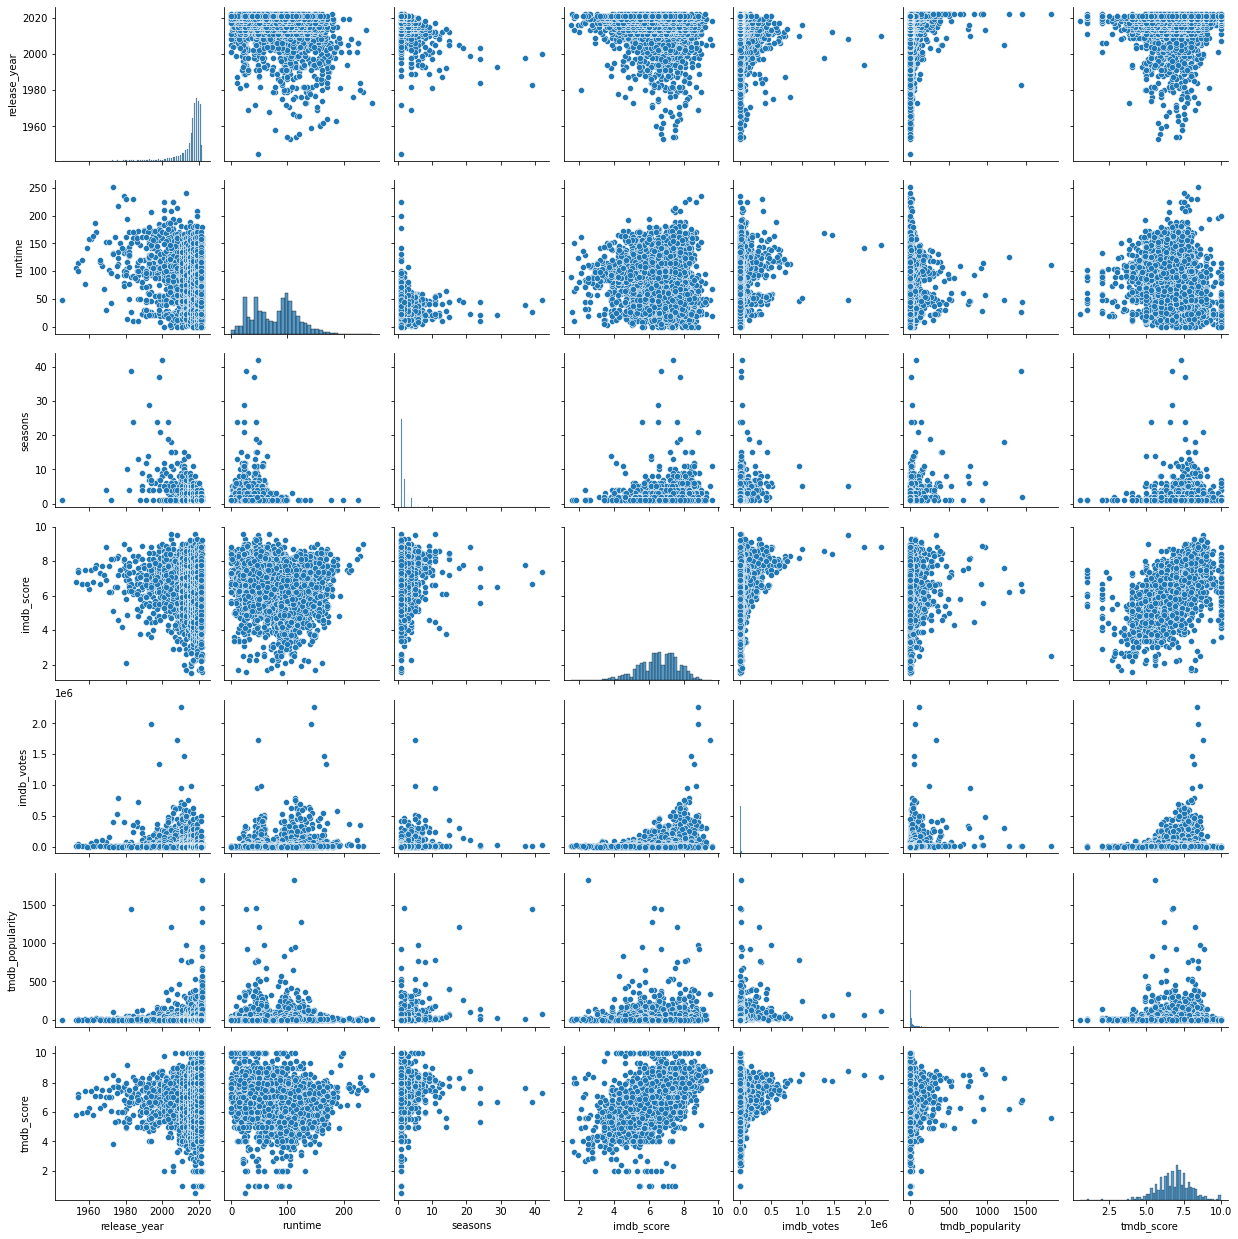

In [7]:
# angelita
sns.pairplot(data)
plt.show()

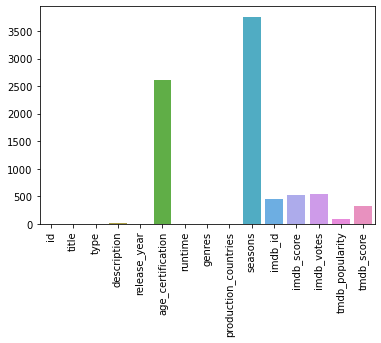

In [8]:
#angelita
sns.barplot(x = data.columns, y = data.isnull().sum().values)
plt.xticks(rotation = 90)
plt.show()

there are null values in age_certification, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score.

In [9]:
# angelita 
data.isnull()

id  title   type  description  release_year  age_certification  \
0     False  False  False        False         False              False   
1     False  False  False        False         False              False   
2     False  False  False        False         False              False   
3     False  False  False        False         False              False   
4     False  False  False        False         False              False   
...     ...    ...    ...          ...           ...                ...   
5801  False  False  False        False         False               True   
5802  False  False  False        False         False               True   
5803  False  False  False        False         False               True   
5804  False  False  False        False         False               True   
5805  False  False  False        False         False               True   

      runtime  genres  production_countries  seasons  imdb_id  imdb_score  \
0       False   False                 False    False     True        True   
1       False   False                 False     True    False       False   
2       False   False                 False     True    False       False   
3       False   False                 False     True    False       False   
4       False   False                 False     True    False       False   
...       ...     ...                   ...      ...      ...         ...   
5801    False   False                 False     True    False       False   
5802    False   False                 False     True     True        True   
5803    False   False                 False     True    False       False   
5804    False   False                 False     True    False       False   
5805    False   False                 False    False    False       False   

      imdb_votes  tmdb_popularity  tmdb_score  
0           True            False        True  
1          False            False       False  
2          False            False       False  
3          False            False       False  
4          False            False       False  
...          ...              ...         ...  
5801       False            False        True  
5802        True            False       False  
5803       False            False        True  
5804       False            False        True  
5805       False            False       False  

[5806 rows x 15 columns]

In [10]:
# angelita 
data.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

the most nulls are within age_certification and seasons, because of this it wouldn't make sense to do any imputations on these columns as it wouldn't provide much information about our data.

In [11]:
# angelita 
data.drop(labels=['age_certification', 'seasons', 'imdb_id', 'description'], axis=1, inplace=True)


mean_imdbScore = int(data['imdb_score'].mean())
data['imdb_score'] = data['imdb_score'].apply(lambda imdbScore : mean_imdbScore if pd.isnull(imdbScore) else imdbScore)

mean_imdbVotes = int(data['imdb_votes'].mean())
data['imdb_votes'] = data['imdb_votes'].apply(lambda imdbVotes : mean_imdbVotes if pd.isnull(imdbVotes) else imdbVotes)


mean_tmdbPop = int(data['tmdb_popularity'].mean())
data['tmdb_popularity'] = data['tmdb_popularity'].apply(lambda tmdbPop : mean_tmdbPop if pd.isnull(tmdbPop) else tmdbPop)


mean_tmdbScore = int(data['tmdb_score'].mean())
data['tmdb_score'] = data['tmdb_score'].apply(lambda tmdbScore : mean_tmdbScore if pd.isnull(tmdbScore) else tmdbScore)




this section is getting rid of data that wouldn't be useful in our calculations/classifications. since there were so many nulls within the columns seasons and age_certification, it made sense to just remove them. imdb_id and description were also removed, because they would have no association with the conclusion as it is just an id number and description of the movie. while for the other numerical data that had nulls, the mean of that column was applied with imputation to fill them in.

In [12]:
# angelita
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   release_year          5806 non-null   int64  
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   imdb_score            5806 non-null   float64
 8   imdb_votes            5806 non-null   float64
 9   tmdb_popularity       5806 non-null   float64
 10  tmdb_score            5806 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 499.1+ KB


reprinting out the info about the data set to see if there is any other cleaning that would need to be done. we can see that we are only missing 1 title, while everything else is max non-null.

In [13]:
# angelita
data_df = data[data.title.notnull()]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5805 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5805 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5805 non-null   object 
 3   release_year          5805 non-null   int64  
 4   runtime               5805 non-null   int64  
 5   genres                5805 non-null   object 
 6   production_countries  5805 non-null   object 
 7   imdb_score            5805 non-null   float64
 8   imdb_votes            5805 non-null   float64
 9   tmdb_popularity       5805 non-null   float64
 10  tmdb_score            5805 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 544.2+ KB


in this step we go ahead and just remove that single row that doesnt include the title.

In [14]:
# angelita 

uniqVals = data_df.nunique()
print(uniqVals)

id                      5805
title                   5751
type                       2
release_year              67
runtime                  205
genres                  1626
production_countries     449
imdb_score                81
imdb_votes              3832
tmdb_popularity         4944
tmdb_score                78
dtype: int64


we can see the amount of unique values each of the columns has. from here it is possible to create a new dataset based off of this one that will allow us to only need to work with things that will have an effect on our conclusion. this would benefit us, because we don't want to calculate into our conclusion things like id and title since those won't have an effect on the predicted outcomes.

In [15]:
# angelita 

netflix_df = data_df.drop(labels=['id', 'title'], axis=1).copy()
netflix_df.describe()

release_year      runtime   imdb_score    imdb_votes  tmdb_popularity  \
count   5805.000000  5805.000000  5805.000000  5.805000e+03      5805.000000   
mean    2016.013609    77.655469     6.485478  2.340718e+04        22.517238   
std        7.325502    39.467866     1.117962  8.299768e+04        68.295381   
min     1945.000000     0.000000     1.500000  5.000000e+00         0.009442   
25%     2015.000000    44.000000     5.900000  6.080000e+02         3.190000   
50%     2018.000000    84.000000     6.500000  3.020000e+03         7.710000   
75%     2020.000000   105.000000     7.300000  2.019400e+04        18.766000   
max     2022.000000   251.000000     9.600000  2.268288e+06      1823.374000   

        tmdb_score  
count  5805.000000  
mean      6.773368  
std       1.154184  
min       0.500000  
25%       6.000000  
50%       6.800000  
75%       7.500000  
max      10.000000

In [23]:
# angelita
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5805 entries, 0 to 5805
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5805 non-null   object 
 1   release_year          5805 non-null   int64  
 2   runtime               5805 non-null   int64  
 3   genres                5805 non-null   object 
 4   production_countries  5805 non-null   object 
 5   imdb_score            5805 non-null   float64
 6   imdb_votes            5805 non-null   float64
 7   tmdb_popularity       5805 non-null   float64
 8   tmdb_score            5805 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 582.6+ KB


In [17]:
# angelita
netflix_df.head()

type  release_year  runtime                 genres production_countries  \
0   SHOW          1945       48      ['documentation']               ['US']   
1  MOVIE          1976      113     ['crime', 'drama']               ['US']   
2  MOVIE          1975       91  ['comedy', 'fantasy']               ['GB']   
3  MOVIE          1979       94             ['comedy']               ['GB']   
4  MOVIE          1973      133             ['horror']               ['US']   

   imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0         6.0     23407.0            0.600         6.0  
1         8.3    795222.0           27.612         8.2  
2         8.2    530877.0           18.216         7.8  
3         8.0    392419.0           17.505         7.8  
4         8.1    391942.0           95.337         7.7

<AxesSubplot:xlabel='type', ylabel='imdb_score'>

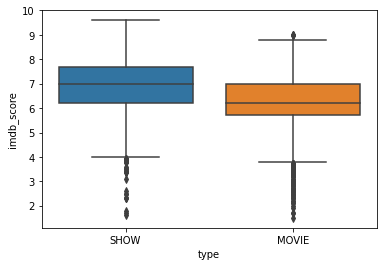

In [18]:
# aaron
sns.boxplot(x=data_df['type'], y = data_df['imdb_score'])

<AxesSubplot:xlabel='runtime', ylabel='imdb_score'>

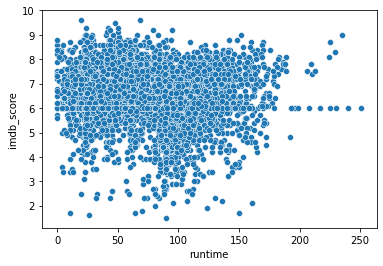

In [29]:
# angelita
sns.scatterplot(x=data_df['runtime'], y = data_df['imdb_score'])

based on this plot our data will be more biased towards movies/shows under 200 minutes, because we dont have much data for the movies/shows over 200 minutes. the runtime with both the highest and lowest scores (outliers) are between 0-100. while for movies/shows between 0-200 have an average range from 4-9 in score, over 200 is about 6.

<AxesSubplot:xlabel='type', ylabel='count'>

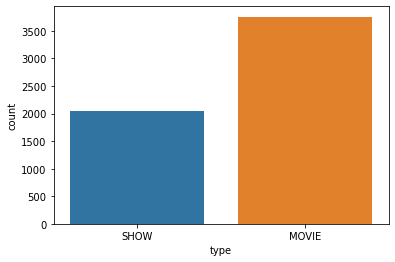

In [44]:
# angelita 

sns.countplot(x=netflix_df['type'])

there are a lot more movies than shows in this data set, so our data will be primarily calculated based off of that.


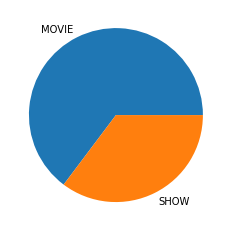

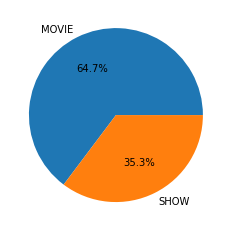

In [50]:
# angelita

labels = ['MOVIE','SHOW']

plt.pie(netflix_df['type'].value_counts(), labels = labels)
plt.show()

plt.pie(netflix_df['type'].value_counts(), labels = labels, autopct='%.1f%%')
plt.show()

In [64]:
movie_df = netflix_df.loc[netflix_df['type'] == 'MOVIE'].copy()
show_df = netflix_df.loc[netflix_df['type'] == 'SHOW'].copy()
show_df['id'] = np.arange(0,2047)


In [65]:
movie_df['id'] = np.arange(0,3758)

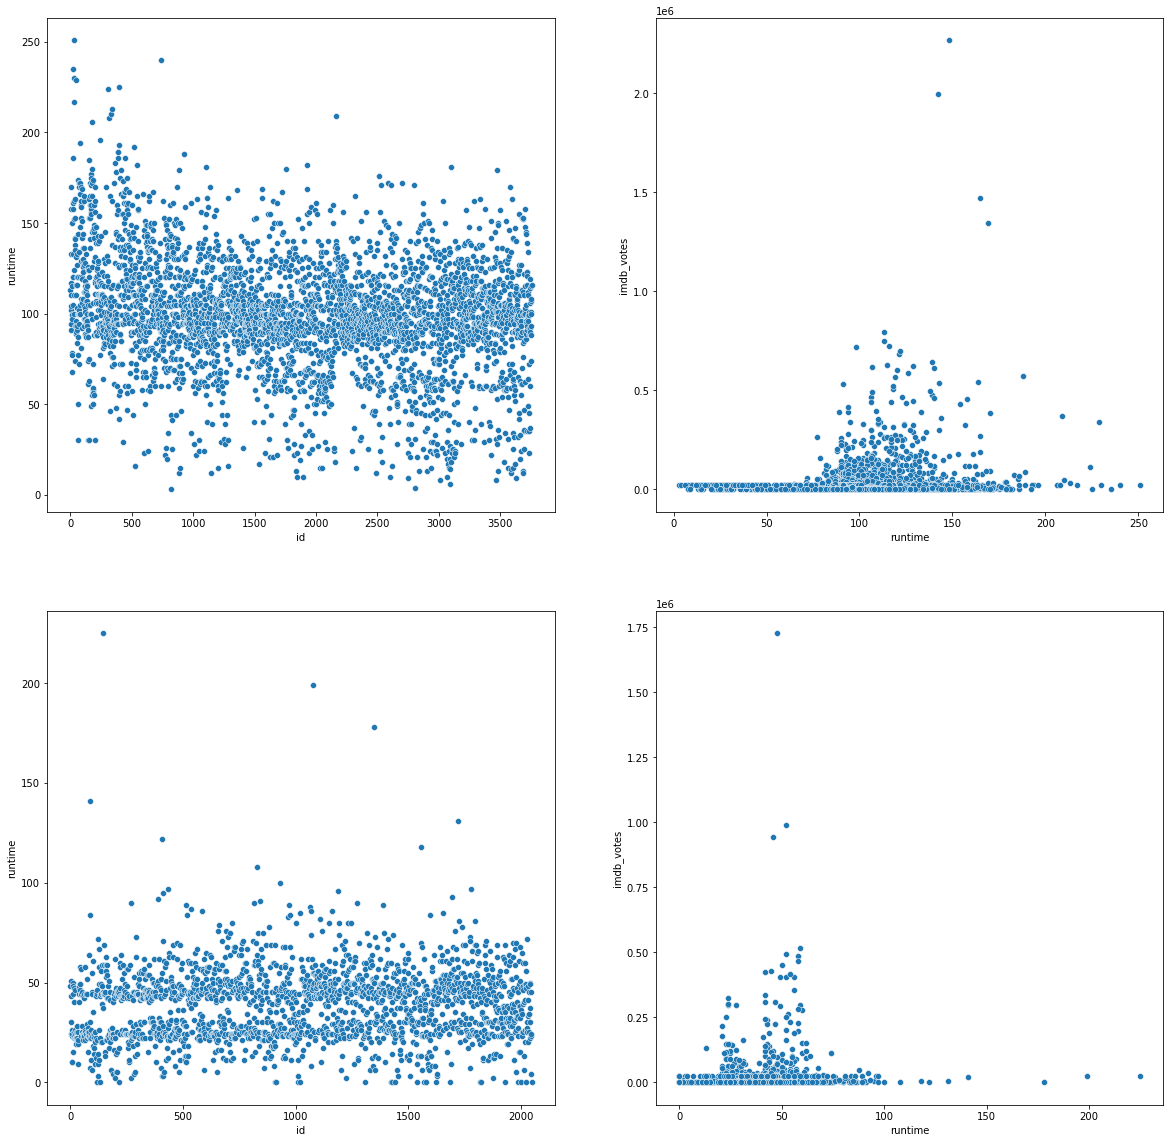

In [73]:
# aaron
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
sns.scatterplot(x=movie_df['id'], y=movie_df['runtime'], ax=axes[0][0])
sns.scatterplot(x = movie_df['runtime'], y = movie_df['imdb_votes'], ax=axes[0][1])
sns.scatterplot(x=show_df['id'], y = show_df['runtime'], ax=axes[1][0])
sns.scatterplot(x=show_df['runtime'], y = show_df['imdb_votes'],ax=axes[1][1])
plt.show()

We wanted to see the run times of movies and shows, but decided to seperate each of them due to the fact that movies would have a greater runtime than a show. Some of the outliers were interesting in the shows category, since some extened to something that can be considered a movie, and how some movies have runtimes that can be considered a show, so either theres some missclassification in the data or a lot of shows/movies stray from the average. And another thing we were interested in was if runtime affected the amount of votes of a movie/show, since some movies/shows may be too long and attract less attention, this may not be the best classifier of popularity however, since this is sourcing from one website, and the general audience of netflix may not go out of there way to cast a vote for 

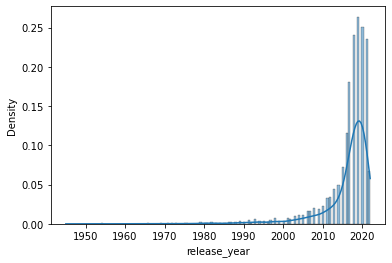

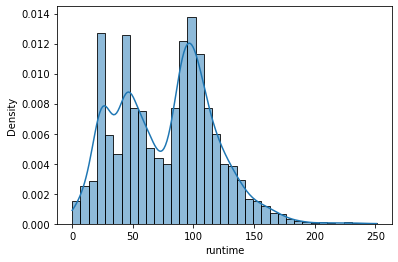

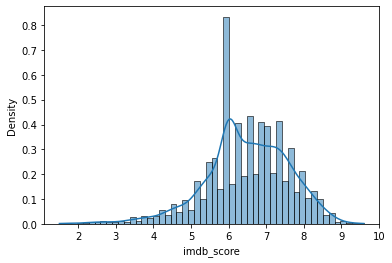

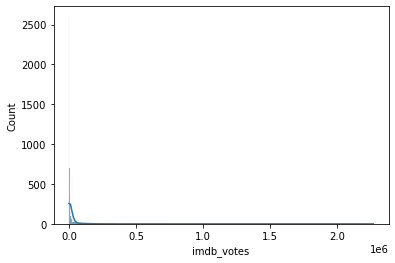

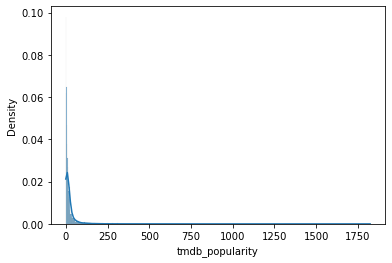

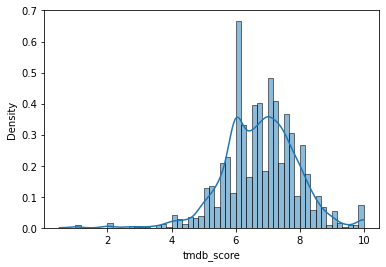

In [74]:
# angelita
sns.histplot(x=netflix_df['release_year'], kde=True, stat='density')
plt.show()
sns.histplot(x = netflix_df['runtime'], kde=True, stat='density')
plt.show()
sns.histplot(x=netflix_df['imdb_score'], kde=True, stat='density')
plt.show()
sns.histplot(x=netflix_df['imdb_votes'], kde=True)
plt.show()
sns.histplot(x=netflix_df['tmdb_popularity'], kde=True, stat='density')
plt.show()
sns.histplot(x=netflix_df['tmdb_score'], kde=True, stat='density')
plt.show()
plt.show()

We wanted to see the density of our continuous variables and how they were distributed within their own range of values. The most stand out one visually, release year, clearly shows how much more recent media is on netflix than old media. For runtime, we can see shows are usually about 30 mins or around 45 mins, and movies are usually around 110 mins. For tbdb popularity and imdb votes, they seem to be quite similar to one another, as their density distribututions seem to be about the same. As well as imdb scores and tmdb scores being around the same. Yet there seems to be more "good" shows than "bad" ones if we take the imdb scores and tmdb scores at face value with 5 as a threshold. 

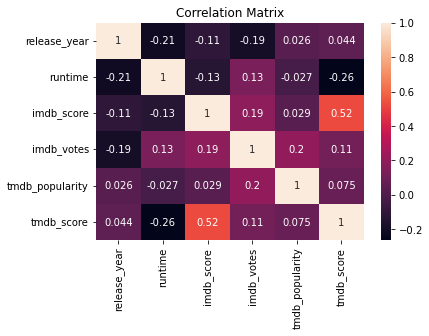

In [75]:
# angelita 

sns.heatmap(netflix_df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

There is no significant multicollinearity within our dataset. There is some multicollinearity between the tmdb sores and the imdb scores. Multicollinearity is when columns of a dataset are highly correlated to each other. We don't columns that are too correlated to each other, because it could affect the results of our predictions. You would check how close the values are to 1, that also being with a lighter color box between the data. 

In [80]:
netflix_df = pd.get_dummies(data=netflix_df, columns=['type', 'genres', 'production_countries'])
netflix_df.drop(labels=['type', 'genres', 'produciton_countries'], axis=1, inplace=True)


release_year  runtime  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0          1945       48         6.0     23407.0            0.600         6.0   
1          1976      113         8.3    795222.0           27.612         8.2   
2          1975       91         8.2    530877.0           18.216         7.8   
3          1979       94         8.0    392419.0           17.505         7.8   
4          1973      133         8.1    391942.0           95.337         7.7   

   type_MOVIE  type_SHOW  \
0           0          1   
1           1          0   
2           1          0   
3           1          0   
4           1          0   

   genres_['action', 'animation', 'comedy', 'crime', 'drama']  \
0                                                  0            
1                                                  0            
2                                                  0            
3                                                  0            
4                                                  0            

   genres_['action', 'animation', 'comedy', 'drama', 'family', 'fantasy', 'scifi']  \
0                                                  0                                 
1                                                  0                                 
2                                                  0                                 
3                                                  0                                 
4                                                  0                                 

   ...  production_countries_['UY']  production_countries_['VE', 'AR']  \
0  ...                            0                                  0   
1  ...                            0                                  0   
2  ...                            0                                  0   
3  ...                            0                                  0   
4  ...                            0                                  0   

   production_countries_['VN']  production_countries_['XX']  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   production_countries_['ZA', 'CA']  production_countries_['ZA', 'GB']  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   production_countries_['ZA', 'US']  production_countries_['ZA']  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            0   
3                                  0                            0   
4                                  0                            0   

   production_countries_['ZW']  production_countries_[]  
0                            0                        0  
1                            0                        0  
2                            0                        0  
3                            0                        0  
4                            0                        0  

[5 rows x 2083 columns]